# Deep Learning: Assignment 1
## Image Classification, Regression, Segmentation, Denoising

## Base functions

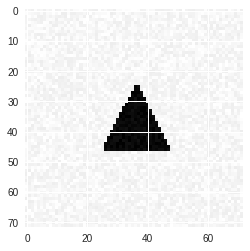

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False, return_pair=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    
    if not return_pair:
      return generate_a_drawing(figsize, U, V, noise)
    else:
      return generate_a_drawing(figsize, U, V, noise=0.0), generate_a_drawing(figsize, U, V, noise=noise)
  
def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 100 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 100 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def generate_dataset_denoising(nb_samples, noise=20.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    Y_denois = np.zeros([nb_samples, im_size])
    X_nois = np.zeros([nb_samples, im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 100 == 0:
            print(i)
        Y_denois[i], X_nois[i] = generate_a_rectangle(noise=noise, free_location=free_location, return_pair=True)
    return [X_nois, Y_denois]
  
def generate_test_set_denoising():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_denoising(nb_samples=300, noise=20.0, free_location=False)
    return [X_test, Y_test]
  

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]



In [0]:
# import libraries

import keras
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input, Embedding, Dropout, Conv2D, Convolution2D, Dense, BatchNormalization, Flatten, MaxPooling2D
from keras.optimizers import SGD, Adam

from sklearn.preprocessing import StandardScaler


## Simple Classification

Given a dataset of centered images (triangle, rectangle, or disk), learn the classification into these three categories. 

We first use a simple, one-layer approach, 
- comparing the SGD and ADAM optimizers
- visualizing weights: the filters, feature maps, or templates for the triangle, rectangle, and disk

In [0]:
# Generate data
X_train, Y_train = generate_dataset_classification(300, 20)
Y_train_categorical = np_utils.to_categorical(Y_train, num_classes=3)
X_test, Y_test = generate_test_set_classification()

# Model: simple, linear
model = Sequential([
  Dense(3, input_shape=(5184,)),
  Activation('softmax')
])

#### Comparing ADAM and SGD

# Optimizer 
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

# Run model, Test set accuracy
history_sgd = model.fit(X_train, Y_train_categorical, validation_data=(X_test,Y_test), epochs=10, batch_size=32, verbose=1)
_, acc_sgd = model.evaluate(X_test, Y_test)

# Optimizer 
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

# Run model, Test set accuracy
history_adam = model.fit(X_train, Y_train_categorical, validation_data=(X_test,Y_test), epochs=10, batch_size=32, verbose=1)
_, acc_adam = model.evaluate(X_test, Y_test)

Generalization accuracy with ADAM is 0.33
Generalization accuracy with SGD is 0.33


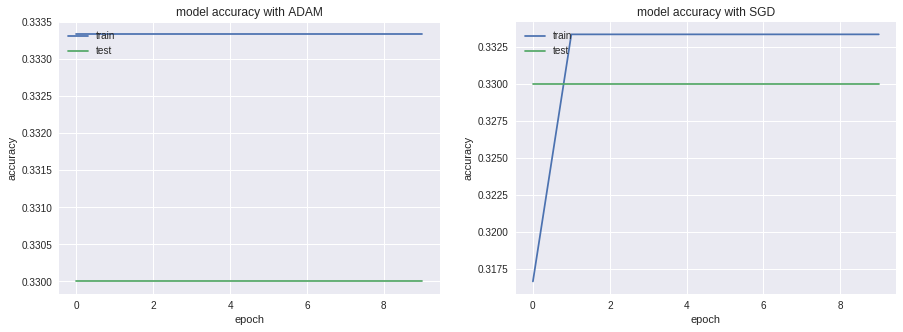

In [110]:
# Evaluate model generalization: Learning Curves
fig, axs = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)

ax = axs[0] 
ax.plot(history_adam.history['acc'])
ax.plot(history_adam.history['val_acc'])
ax.set_title('model accuracy with ADAM')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.legend(['train', 'test'], loc='upper left')

ax = axs[1] 
ax.plot(history_sgd.history['acc'])
ax.plot(history_sgd.history['val_acc'])
ax.set_title('model accuracy with SGD')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.legend(['train', 'test'], loc='upper left')

print('Generalization accuracy with ADAM is ' + str(round(acc_adam, 2)))
print('Generalization accuracy with SGD is ' + str(round(acc_sgd, 2)))



The learning curves indicate that, with our hyperparameters, both SGD and ADAM overfit the training set such that test set accuracy plateaus from the beginning. Additionally, there is a fixed generalization gap and test accuracy while the model is being learnt, which suggests training-agnostic prediction which is worrying. 


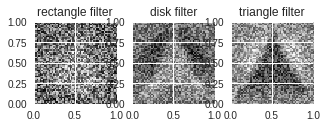

In [88]:
# Visualize filters
filters = list(model.get_weights()[0].T)
n_filters = len(filters)
filters_names = ['rectangle', 'disk', 'triangle']

fig, axs = plt.subplots(figsize=(5, 5), nrows=1, ncols=n_filters)

for idx in range(n_filters):
  
  filter = filters[idx]
  filter_name = filters_names[idx]
  
  ax = axs[idx] 
  img = filter.reshape((IMAGE_SIZE,IMAGE_SIZE))
  ax.imshow(img, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
  ax.set_xlim([0,1])
  ax.set_ylim([0,1])
  ax.set_title(filter_name + ' filter')

The filter for triangle seems to be clearest, which leads to the conjecture that the triangle class is possible 'more linearly seperable'  than disk and rectangle. 

## A More Difficult Classification Problem

We now add an additional difficulty to the classification problem: the *non-centeredness for the shapes in the dataset*. 

Consequently, we will suggest and *evaluate* a more complex classification model, a shallow CNN, to flexibly adapt to this inter-class variability. 

In [0]:
# Generate data
[X_train, Y_train] = generate_dataset_classification(2000, 20, True)
[X_test, Y_test] = generate_test_set_classification()

# Reformat data
Y_train_categorical = keras.utils.to_categorical(Y_train)
X_train = X_train.reshape((-1,72,72,1))
X_test = X_test.reshape((-1,72,72,1))

# Model (sequential): simple CNN
model = Sequential()
model.add(Convolution2D(40,kernel_size=(5,5),input_shape=(72,72,1,)))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics=['acc']) 

# Run model 
history = model.fit(X_train, Y_train_categorical, validation_split=0.1, epochs=150, batch_size=32, verbose=1)

300/300 [==============================] - 1s 2ms/step
Generalization accuracy: 0.93


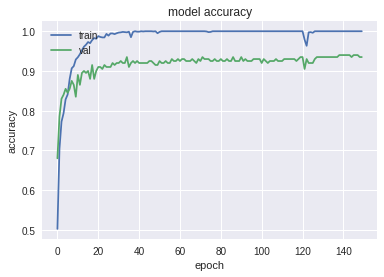

In [90]:
# Evaluate model performance
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

print('Generalization accuracy: ' + str(round(model.evaluate(X_test, Y_test)[1], 2)))


While there remains a generalization gap accounting for overfitting the training data, despite the dropout regularization we added, the model still generalizes with an accuracy of 93%, testifying to its higher degree of flexibility than the first one we have tried.

## Regression

We now face a regression task. Given the images as input, we use a CNN to ouput the predictions of the 6 xy coordinates of the three vertices of a triangle. 

In [0]:
def reorder_along_x_coord(Y):
  '''
  reorders an array of flattened 3D points
  according to increasing y coordinates
  '''
  
  for idx in range(Y.shape[0]):
    
    curr_point = Y[idx].reshape(3, 2)
    new_y_coord_order = curr_point[:, 0].argsort()
    Y[idx] = curr_point[new_y_coord_order].flatten()
  
  return Y

Two reformatting choices have empirically increased generalization power: 
- taking the z-score of the labels
- reducing unnecessary variability in the labels: the three vertices are a priori presented in a random order, we choose to order them

In [0]:
# Generate data
[X_train, Y_train] = generate_dataset_regression(1000, 20)
[X_test, Y_test] = generate_test_set_regression()

In [0]:
# Reformat data
X_train = X_train.reshape((-1,72,72,1))
X_test = X_test.reshape((-1,72,72,1))
Y_train = reorder_along_x_coord(Y_train)
Y_test = reorder_along_x_coord(Y_test)
normalizer = StandardScaler()
y_train_normalize = normalizer.fit_transform(Y_train)
y_test_normalize = normalizer.transform(Y_test)

# Model (sequential)
model = Sequential()
model.add(Convolution2D(40, kernel_size=(5,5), input_shape=(72,72,1,), activation='relu'))
model.add(Dropout(0.3))
model.add(Convolution2D(20, kernel_size=(4,4), activation='relu'))
model.add(Flatten())
model.add(Dropout(0.3)) 
model.add(Dense(6))

adam = Adam(lr=0.001)
model.compile(loss='mean_squared_error',
              optimizer=adam)


# Run model 
history= model.fit(X_train,y_train_normalize,validation_split=0.1,epochs=40,batch_size=64, verbose=1)

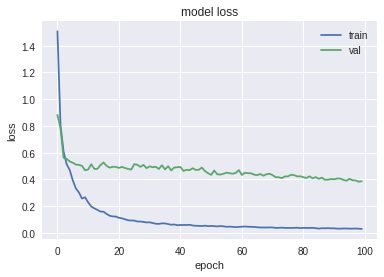

300/300 [==============================] - 2s 7ms/step
Network generalization score is 0.37


In [94]:
# plot learning curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# assess generalization score
print('Network generalization score is ' + str(round(model.evaluate(X_test, y_test_normalize),2)))

The learning curve generalization gap is closing and the prediction on the test set, visualized below, shows that the distribution learnt on the training set is generalizing. 

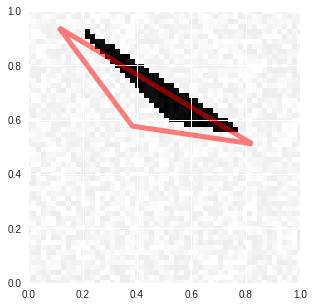

In [95]:
# visualize a prediction on the test set
predictions_test = model.predict(X_test)
Y_pred = normalizer.inverse_transform(predictions_test)
visualize_prediction(X_test[7], Y_pred[7])

## Denoising Hourglass Network

We implement an hourglass network with specific architecture choices:
- we determine that a single 'merge' at the last layer is sufficient to inject the input shape information in the 'decoding' part of the model
- we include batchnorms to stabilize the gradient during descent

Empirically, without the last *classification* (sigmoid) layer, we are faced with *regression*. The result is that the classifier predicts the correct shape but does not effectively deal with the noise: it is still there, in the background, blurred. The benefit of the last layer is immense: it is responsible for *binarizing* the ouput: 0 is the noise, 1 is the desired shape to retain.  

In [0]:
from keras.layers import *
from keras.models import Model
from keras.optimizers import SGD, Adam

# Training data
X_train, Y_train = generate_dataset_denoising(nb_samples=100, noise=40.0)
X_test, Y_test = generate_dataset_denoising(nb_samples=10, noise=40.0)

# Reformatting data
X_train = X_train.reshape((-1,72,72,1))
X_test = X_test.reshape((-1,72,72,1))
Y_train = Y_train.reshape((-1,72,72,1))
Y_test = Y_test.reshape((-1,72,72,1))

# Model (functional): segmentation hourglass network with last-layer merge

inputs = Input(shape=(72,72,1))

conv1a = Conv2D(64, 3, activation = 'relu', padding='SAME')(inputs) 
conv1b = Conv2D(64, 3, activation = 'relu', padding='SAME')(conv1a) 
batchnorm1 = BatchNormalization()(conv1b)
pool1 = MaxPooling2D(pool_size=(2, 2), padding='SAME')(batchnorm1)

conv2a = Conv2D(128, 3, activation = 'relu', padding='SAME')(pool1) 
conv2b = Conv2D(128, 3, activation = 'relu', padding='SAME')(conv2a)
batchnorm2 = BatchNormalization()(conv2b)
pool2 = MaxPooling2D(pool_size=(2, 2), padding='SAME')(batchnorm2)

conv3a = Conv2D(256, 3, activation = 'relu', padding='SAME')(pool2) 
conv3b = Conv2D(256, 3, activation = 'relu', padding='SAME')(conv3a) 
batchnorm3 = BatchNormalization()(conv3b)
pool3 = MaxPooling2D(pool_size=(2, 2), padding='SAME')(batchnorm3)

conv4a = Conv2D(512, 3, activation = 'relu', padding='SAME')(pool3) 
conv4b = Conv2D(512, 3, activation = 'relu', padding='SAME')(conv4a)
batchnorm4 = BatchNormalization()(conv4b)

up5 = UpSampling2D(size = (2,2))(batchnorm4)
up_conv5 = Conv2D(256, 2, activation = 'relu', padding='SAME')(up5) 
conv5b = Conv2D(256, 3, activation = 'relu', padding='SAME')(up_conv5) 
conv5c = Conv2D(256, 3, activation = 'relu', padding='SAME')(conv5b)
batchnorm5 = BatchNormalization()(conv5c)

up6 = UpSampling2D(size = (2,2))(batchnorm5)
up_conv6 = Conv2D(128, 2, activation = 'relu', padding='SAME')(up6) 
conv6b = Conv2D(128, 3, activation = 'relu', padding='SAME')(up_conv6) 
conv6c = Conv2D(128, 3, activation = 'relu', padding='SAME')(conv6b)
batchnorm6 = BatchNormalization()(conv6c)

up7 = UpSampling2D(size = (2,2))(batchnorm6)
up_conv7 = Conv2D(64, 2, activation = 'relu', padding='SAME')(up7) 
merge7 = concatenate([conv1b,up_conv7], axis=-1)
conv7b = Conv2D(64, 3, activation = 'relu', padding='SAME')(merge7) 
conv7c = Conv2D(64, 3, activation = 'relu', padding='SAME')(conv7b)
batchnorm7 = BatchNormalization()(conv7c)

conv8 = Conv2D(1, 1, activation = 'relu')(batchnorm7)
binary = Dense(1,activation='sigmoid')(conv8)

model = Model(input = inputs, output = binary) 

# Optimizer
model.compile(optimizer = 'adam',
              metrics=['mae'],
              loss = 'binary_crossentropy')


# Run model
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=20, batch_size=10, verbose=1)

In [112]:
# Model description
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 72, 72, 1)    0                                            
__________________________________________________________________________________________________
conv2d_56 (Conv2D)              (None, 72, 72, 64)   640         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, 72, 72, 64)   36928       conv2d_56[0][0]                  
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 72, 72, 64)   256         conv2d_57[0][0]                  
__________________________________________________________________________________________________
max_poolin

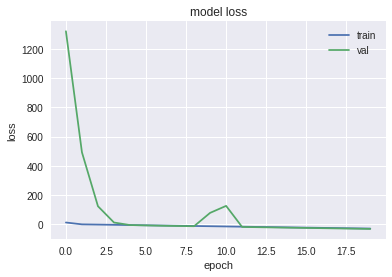

10/10 [==============================] - 1s 89ms/step
Generalization accuracy is 188.8369140625


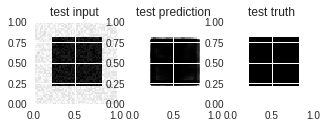

In [118]:
# Evaluate model performance

# Plot learning curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Visualize performance on one example from the test set
i=4
img_test = X_test[i][:, :, 0]
img_predict = model.predict(np.expand_dims(X_test[i], axis=0))[0, :, :, 0]
img_label = Y_test[i][:, :, 0]

fig, axs = plt.subplots(figsize=(5, 5), nrows=1, ncols=3)

ax = axs[0] 
img = img_test
ax.imshow(img, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_title('test input')

ax = axs[1] 
img = img_predict
ax.imshow(img, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_title('test prediction')

ax = axs[2] 
img = img_label
ax.imshow(img, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_title('test truth')

# Test set accuracy
score, acc = model.evaluate(X_test, Y_test)
print('Generalization accuracy is ' + str(acc))

The generalization cruve shows the generalization gap quickly closing over an epoch or two for **near-perfect generalization** that is visually observed in the example above. 